## The contents include:

* 7. Overcoming batch effects in expression data
* 8. An exploratory analysis of data with PCA
* 9. Finding the differentially expressed genes
* 10. Working with the data of multiple classes



## 7. Overcoming batch effects in expression data

As processing samples in different batches, the systematic errors will be caused, which is named batch effects. Systematic errors can be reduced, to some extent, by careful, experimental design but cannot be eliminated completely unless the study is performed under a single batch. It is difficult to combine data from different batches due to batch effects, which makes the statistical analysis of the data unsuccessful. Therefore, if we do preprocessing before the batches are combined, the analysis will be easy. <br>
处理不同批次的样品会导致系统误差，这种称为批量效应。 在一定程度上，通过仔细严谨的实验设计可以减少系统误差，但是除非单一批次进行研究，否则不能完全消除。由于批处理效应而难以合并不同批次的数据，从而使得数据的统计分析不顺利。因此，如果我们在批次合并之前进行预处理，分析将变得简单许多。<br>

In this section, we need a dataset that shows the batch effect without any preprocessing. Take the `bladderbatch` data as an example, which consists of five batches. The data is a part of the `bladderbatch` package. We will use `sva` library as well.<br>

In [1]:
## install and library packages
if (!requireNamespace("BiocManager", quietly = TRUE))
install.packages("BiocManager")

BiocManager::install(c("sva", "bladderbatch"))

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'sva', 'bladderbatch'



package 'sva' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Master\AppData\Local\Temp\RtmpSI9RIu\downloaded_packages


installing the source package 'bladderbatch'


Old packages: 'BH', 'bit', 'caTools', 'cli', 'FactoMineR', 'fansi', 'farver',
  'GetoptLong', 'ggridges', 'gplots', 'hms', 'knitr', 'leaps', 'multcomp',
  'mvtnorm', 'PMA', 'precrec', 'prettyunits', 'pROC', 'RCurl', 'RSQLite',
  'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun', 'XML', 'xts', 'zoo'



In [4]:
library(sva)
librar
library(bladderbatch)

In [6]:
## Load `bladderdata`. And extract the expression matrix and pheno data from it.
data(bladderdata)

pheno <- pData(bladderEset)
edata <- exprs(bladderEset)
pheno

,sample,outcome,batch,cancer
,<int>,<fct>,<dbl>,<fct>
GSM71019.CEL,1,Normal,3,Normal
GSM71020.CEL,2,Normal,2,Normal
GSM71021.CEL,3,Normal,2,Normal
GSM71022.CEL,4,Normal,3,Normal
GSM71023.CEL,5,Normal,3,Normal
GSM71024.CEL,6,Normal,3,Normal
GSM71025.CEL,7,Normal,2,Normal
GSM71026.CEL,8,Normal,2,Normal
GSM71028.CEL,9,sTCC+CIS,5,Cancer


In [7]:
mydata <- bladderEset[,sampleNames(bladderEset)[1:8]]
mydata

ExpressionSet (storageMode: lockedEnvironment)
assayData: 22283 features, 8 samples 
  element names: exprs, se.exprs 
protocolData: none
phenoData
  sampleNames: GSM71019.CEL GSM71020.CEL ... GSM71026.CEL (8 total)
  varLabels: sample outcome batch cancer
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation: hgu133a 

And then use `arrayQualityMetrics` to perform a quality check on the data, and then we will have a look at the batch effects.

In [8]:
library(arrayQualityMetrics)

In [9]:
arrayQualityMetrics(mydata, outdir="F:/qc_be")

The directory 'F:/qc_be' has been created.

Warning message in svgStyleAttributes(style, svgdev):
"Removing non-SVG style attribute name(s): subscripts, group.number, group.value"
Warning message in svgStyleAttributes(style, svgdev):
"Removing non-SVG style attribute name(s): subscripts, group.number, group.value"
Warning message in svgStyleAttributes(style, svgdev):
"Removing non-SVG style attribute name(s): subscripts, group.number, group.value"
Warning message in svgStyleAttributes(style, svgdev):
"Removing non-SVG style attribute name(s): subscripts, group.number, group.value"
Warning message in svgStyleAttributes(style, svgdev):
"Removing non-SVG style attribute name(s): subscripts, group.number, group.value"
Warning message in svgStyleAttributes(style, svgdev):
"Removing non-SVG style attribute name(s): subscripts, group.number, group.value"
Warning message in svgStyleAttributes(style, svgdev):
"Removing non-SVG style attribute name(s): subscripts, group.number, group.value"
Warn

In [10]:
## Take a look at the heatmap and other plots produced for the samples to check for the batch effect. 
## In the filefolder, there are files called 'hm' and 'ma'.
library(hexbin)

In [11]:
browseURL("F:/qc_be/index.html")

In [12]:
## Create the model matrix for the dataset 
## (note that only the first and third columns have been used from the model matrix as the data has only one condition).
mod1 <- model.matrix(~as.factor(cancer), data=pData(mydata))[,c(1,3)]
mod1

,(Intercept),as.factor(cancer)Normal
GSM71019.CEL,1,1
GSM71020.CEL,1,1
GSM71021.CEL,1,1
GSM71022.CEL,1,1
GSM71023.CEL,1,1
GSM71024.CEL,1,1
GSM71025.CEL,1,1
GSM71026.CEL,1,1


In [13]:
batch <- pData(mydata)$batch  ## define the batches


## Extract the expression matrix from the expression set object myData, where the batch effect has to be removed
edata <- exprs(mydata)

In [14]:
combat_edata <- ComBat(dat=edata, batch=batch, mod=mod1, par.prior=TRUE) # numCovs=NULL?

Found2batches

Adjusting for0covariate(s) or covariate level(s)



Standardizing Data across genes


Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




In [15]:
## Create an ExpressionSet object with everything as the original input data, 
## except the expression matrix—which is replaced by the matrix received as a result of the `ComBat` function in the last step.

mydata2 <- mydata
exprs(mydata2) <- combat_edata

In [16]:
## Rerun the `arrayQualityMetrics` function to check for the elimination of batch effects with this new object as the input.
arrayQualityMetrics(mydata2, outdir="F:/qc_nbe")

The directory 'F:/qc_nbe' has been created.

Warning message in svgStyleAttributes(style, svgdev):
"Removing non-SVG style attribute name(s): subscripts, group.number, group.value"
Warning message in svgStyleAttributes(style, svgdev):
"Removing non-SVG style attribute name(s): subscripts, group.number, group.value"
Warning message in svgStyleAttributes(style, svgdev):
"Removing non-SVG style attribute name(s): subscripts, group.number, group.value"
Warning message in svgStyleAttributes(style, svgdev):
"Removing non-SVG style attribute name(s): subscripts, group.number, group.value"
Warning message in svgStyleAttributes(style, svgdev):
"Removing non-SVG style attribute name(s): subscripts, group.number, group.value"
Warning message in svgStyleAttributes(style, svgdev):
"Removing non-SVG style attribute name(s): subscripts, group.number, group.value"
Warning message in svgStyleAttributes(style, svgdev):
"Removing non-SVG style attribute name(s): subscripts, group.number, group.value"
War

In [18]:
browseURL("F:/qc_nbe/index.html")

## 8. An exploratory analysis of data with PCA

If we measure too many human genes(>2000) in many samples, we will get a multiple column-row matrix. That will makes it difficult to build a pattern. So it is better to smplify the multidimensional pattern to a lower dimensions in order to explain and graphically represent the data.<br>
Principal Components Analysis (PCA) is a method that achieves this by performing a covariance analysis between factors. This finds the orthogonal components that represent the data and each component (called principal components) that represents the dimension where the features are more extended. Thus, PCA projects data onto a lower dimensional space and can be used as an exploratory method to serve purposes such as finding patterns in data and noise reduction. In this section, we will deal with PCA for microarray data.<br>
如果我们在很多样本中测量了太多的人类基因（>2000）,我们将得到一个多列-多行矩阵。这会让人难以构建出一种模式。因此，将多维模式缩小到更低的维度，能够很好的解释并图形化这些数据。<br>
主成分分析（PCA）是一种通过执行因素之间的协方差分析来实现这一点的方法。这将会找到表现数据的正交分量和每个组件（称为主要组件），这些组件都有着被极大扩展的维度特征。因此，PCA将数据投影到较低维的空间上，又可以被用作探索性方法来提供诸如查找数据模式和降低噪声等的用途。 在本节中，我们将处理PCA的微阵列数据。

In [19]:
library(affy)
mydata <- ReadAffy(celfile.path= "F:/GSE24460_RAW/")

In [20]:
## select your data for the analysis.
mydata.pca <- exprs(mydata)

In [21]:
## Transpose the matrix to get the genes (features) as columns
mypca <- prcomp(mydata.pca, scale=TRUE)

In [22]:
## check the principal components, take a look at the summary of created objects
summary(mypca)

Importance of components:
                          PC1     PC2     PC3     PC4
Standard deviation     1.9305 0.46011 0.17821 0.17182
Proportion of Variance 0.9317 0.05293 0.00794 0.00738
Cumulative Proportion  0.9317 0.98468 0.99262 1.00000

In [24]:
## Create a vector of colors for every sample in the data
colors <- c("green","cyan","violet","magenta")

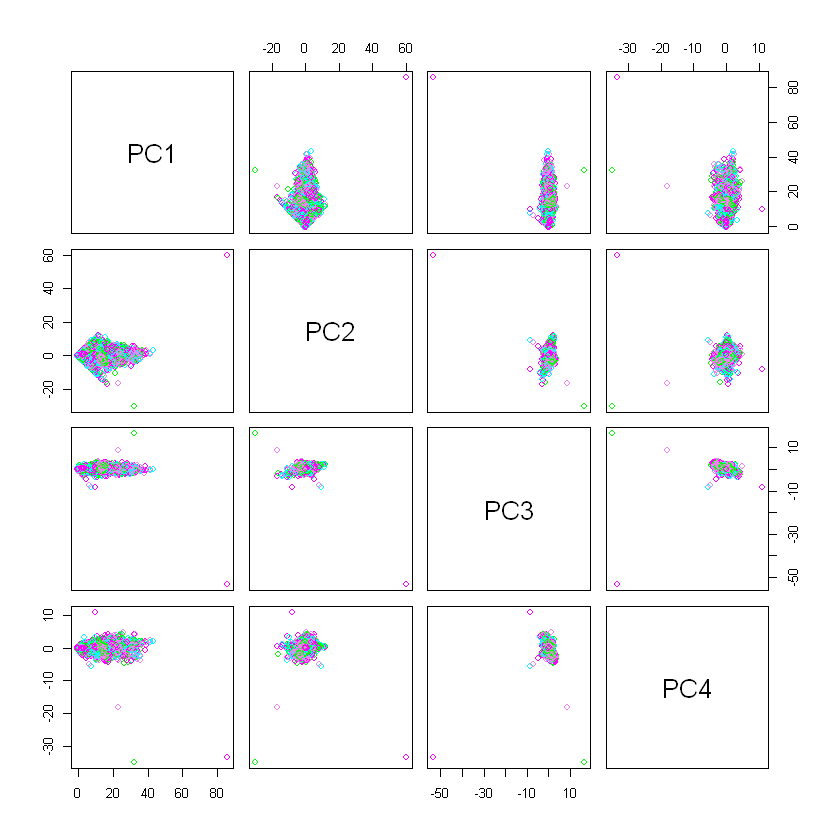

In [25]:
## plot the principal components, use the `pairs` function.(note that it might take some time depending on the size of the data)
pairs(mypca$x, col=colors)

In [ ]:
mydata.loess <- normalize.AffyBatch.loess(mydata)
mydata.loess
boxplot(mydata.loess)

The PCA computation via the `prcomp` function performs the principal component analysis on the data matrix. It returns the principal components, their standard deviations (the square roots of Eigen values), and the rotation (containing the Eigen vectors).

## 9. Finding the differentially expressed genes(查找差异表达的基因)

At the genome level, we know cells have similar genes. But what makes them different? As we all known, only a fraction of a genome is expressed in each cell, and this phenomenon of selective expression of genes based on cell types is the baseline behind the concept of differential gene expression. Thus, it is important to find which genes show differential expression in a particular cell. This will be performed by comparing the cell under study with a reference, usually called control. We will present how to find the DE genes for a cell based on the expression levels of the control and treatment cells.<br>
在基因组水平上，我们知道细胞具有相似的基因。但是因为什么才使得他们有所不同？众所周知，每个细胞只有一小部分基因组表达，这种基于细胞类型选择性表达基因的现象是差异基因表达概念的基础。因此，找出哪些基因在特定细胞中表现出差异表达很重要。这将通过比较实验组细胞和对照组细胞来进行参考。我们将根据对照组和实验组细胞的表达水平来演示如何找到细胞的DE基因。<br>

1、The normalized expression data for treatment and control samples. Take the `quantile` normalized data as an example.实验组和对照组样本的标准化表达数据.以`quantile`标准化数据为例.<br>
2、The experiment and phenotype details, which are part of the `affyBatch` or `ExpressionSet` object.需要`affyBatch`或`ExpressionSet`对象的实验和表型细节部分.<br>
4、The R library, `limma`, that houses one of the most popular methods in R for differential gene expression analysis.R 库,limma是R中用于差异基因表达分析的最流行的方法之一.<br>
5、For demonstration, use normal colon cancer preprocessed `affy` data from the `antiProfilesData` package.为了演示,使用来自`antiProfilesData`软件包的正常结肠癌的预处理`affy`数据.<br>

The `limma` stands for linear models for microarray dat, which is used for analyzing gene expression microarray data, especially the use of linear models for analyzing gene expression data. It implements several methods of linear modeling for microarray data that can be used to identify DE genes. At first, it fits a linear model for each gene in the data given a set of arrays. Thereafter, it uses an empirical Bayes method to assess differential expression. This computes the statistical test and corresponding score in the form of p-values, log fold change, and so on.<br>
“limma”代表微阵列数据的线性模型，用于分析基因表达微阵列数据，尤其是使用线性模型分析基因表达数据。它实现了可用于识别DE基因的微阵列数据的多种线性建模方法。首先，它对给定一组数组的数据中的每个基因进行线性模型的拟合。此后，它使用经验贝叶斯方法来评估差异表达。这以p值，log倍数变化等形式计算统计测试和相应分数。

In [26]:
BiocManager::install(c("limma", "antiProfilesData"))

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'limma', 'antiProfilesData'



package 'limma' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'limma'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying D:\R-3.6.2\library\00LOCK\limma\libs\x64\limma.dll to D:\R-3.6.2\library\limma\libs\x64\limma.dll: Permission denied"
Warning message:
"restored 'limma'"



The downloaded binary packages are in
	C:\Users\Master\AppData\Local\Temp\RtmpSI9RIu\downloaded_packages


installing the source package 'antiProfilesData'


Old packages: 'BH', 'bit', 'caTools', 'cli', 'FactoMineR', 'fansi', 'farver',
  'GetoptLong', 'ggridges', 'gplots', 'hms', 'knitr', 'leaps', 'multcomp',
  'mvtnorm', 'PMA', 'precrec', 'prettyunits', 'pROC', 'RCurl', 'RSQLite',
  'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun', 'XML', 'xts', 'zoo'



In [30]:
library(affy)
library(antiProfilesData)
library(affyPLM)
library(limma)

In [31]:
## Get the data (the colon cancer data) from the antiProfilesData package 
## and subset the first 16 samples that represent the normal and tumor samples (eight each)
data(apColonData)
mydata <- apColonData[, sampleNames(apColonData)[1:16]]
mydata

ExpressionSet (storageMode: lockedEnvironment)
assayData: 5339 features, 16 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM95473 GSM95474 ... GSM95488 (16 total)
  varLabels: filename DB_ID ... Status (7 total)
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation: hgu133plus2 

In [32]:
mydata_quantile <- normalize.ExpressionSet.quantiles(mydata)
mydata_quantile

ExpressionSet (storageMode: lockedEnvironment)
assayData: 5339 features, 16 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM95473 GSM95474 ... GSM95488 (16 total)
  varLabels: filename DB_ID ... Status (7 total)
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation: hgu133plus2 

In [33]:
## Prepare a design matrix based on the experiment details and `phenoData`
## The design matrix describes the experiment condition in each of its column. In our case,
## we have only two conditions, and hence, the single column design matrix with appropriate experiment indication works as well.
design <- model.matrix(~0 + pData(mydata)$Status)   # design <- model.matrix(~-1 + factor(pData(myData_quantile)$type))
design

,pData(mydata)$Status
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1
10,1


In [34]:
## Fit a linear model using the expression data and design matrix.使用表达式数据和设计矩阵拟合线性模型.
fit <- lmFit(mydata_quantile,design)
fit

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

An object of class "MArrayLM"
$coefficients
             pData(mydata)$Status
1555078_at             -0.3891325
238493_at               0.3318299
1562133_x_at           -0.3822317
1559616_x_at           -0.9623383
235687_at              -0.6461947
5334 more rows ...

$rank
[1] 1

$assign
[1] 1

$qr
$qr
  pData(mydata)$Status
1            -2.828427
2             0.000000
3             0.000000
4             0.000000
5             0.000000
11 more rows ...

$qraux
[1] 1

$pivot
[1] 1

$tol
[1] 1e-07

$rank
[1] 1


$df.residual
[1] 15 15 15 15 15
5334 more elements ...

$sigma
  1555078_at    238493_at 1562133_x_at 1559616_x_at    235687_at 
   0.3893793    1.3899476    0.4058717    0.6304099    0.6146187 
5334 more elements ...

$cov.coefficients
                     pData(mydata)$Status
pData(mydata)$Status                0.125

$stdev.unscaled
             pData(mydata)$Status
1555078_at              0.3535534
238493_at               0.3535534
1562133_x_at            0.3535534
1559616_

In [35]:
## After having a linear model fit, compute the moderated statistics for it by `eBayes` function
fitE <- eBayes(fit)
fitE

An object of class "MArrayLM"
$coefficients
             pData(mydata)$Status
1555078_at             -0.3891325
238493_at               0.3318299
1562133_x_at           -0.3822317
1559616_x_at           -0.9623383
235687_at              -0.6461947
5334 more rows ...

$rank
[1] 1

$assign
[1] 1

$qr
$qr
  pData(mydata)$Status
1            -2.828427
2             0.000000
3             0.000000
4             0.000000
5             0.000000
11 more rows ...

$qraux
[1] 1

$pivot
[1] 1

$tol
[1] 1e-07

$rank
[1] 1


$df.residual
[1] 15 15 15 15 15
5334 more elements ...

$sigma
  1555078_at    238493_at 1562133_x_at 1559616_x_at    235687_at 
   0.3893793    1.3899476    0.4058717    0.6304099    0.6146187 
5334 more elements ...

$cov.coefficients
                     pData(mydata)$Status
pData(mydata)$Status                0.125

$stdev.unscaled
             pData(mydata)$Status
1555078_at              0.3535534
238493_at               0.3535534
1562133_x_at            0.3535534
1559616_

In [36]:
## The output can be ranked and top-ranking genes extracted from it
tested <- topTable(fitE, adjust="fdr", sort.by="B", number=Inf)
tested

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
210372_s_at,5.200189,2.9369060,18.586820,2.082126e-12,1.111647e-08,17.909406
205470_s_at,6.255458,3.4624353,14.523453,9.365043e-11,2.499998e-07,14.665745
204855_at,13.342429,8.3325984,12.511677,8.820153e-10,1.260731e-06,12.634755
219795_at,6.773997,3.2696607,12.454113,9.445448e-10,1.260731e-06,12.571572
220133_at,3.223162,1.5617431,12.127986,1.399296e-09,1.494168e-06,12.207825
204259_at,7.111360,3.6682683,10.809794,7.511799e-09,6.684249e-06,10.631112
203585_at,3.814912,2.3970818,10.575189,1.030032e-08,7.014783e-06,10.331384
203485_at,-1.477512,-0.7942994,-10.526023,1.101229e-08,7.014783e-06,10.267797
219752_at,2.948165,1.8787889,10.473843,1.182488e-08,7.014783e-06,10.200014


In [37]:
## To add the conditions of the p-values or other conditions to get the DE genes.添加p值或其他条件的条件以获得DE基因.
DE <- tested[tested$adj.P.Val<0.01,]
dim(DE)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] 1211    6

In [38]:
DE <- tested[tested$adj.P.Val< 0.01 & abs(tested$logFC) >2, ]
dim(DE)

[1] 558   6

## 10. Working with the data of multiple classes

We know how to make a analysis with two experimental groups, namely, treatment and control. But if we faces three or more, how can we compare them systematically against each other?<br>
我们能够将对照组和实验组数据进行分析，但是如果我们遇到三个甚至更多的组别的时候该怎么将他们进行对比呢？<br>

Take another dataset from the `leukemiasEset` package as an example. The data is from 60 bone marrow samples of patients with one of the four main types of leukemia (ALL, AML, CLL, and CML) and non-leukemia controls. However, for demonstration purposes, we just take three samples from each of these categories. <br>

We need to principally focus on creating the design matrix for the comparison, which is the key difference. And then present it on imaginary data with three conditions and pairwise comparisons.主要需要专注于创建用于比较的设计矩阵，这是关键区别。 用三个条件和成对比较在虚数数据上显示

In [40]:
BiocManager::install("leukemiasEset")

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'leukemiasEset'

installing the source package 'leukemiasEset'


Old packages: 'BH', 'bit', 'caTools', 'cli', 'FactoMineR', 'fansi', 'farver',
  'GetoptLong', 'ggridges', 'gplots', 'hms', 'knitr', 'leaps', 'multcomp',
  'mvtnorm', 'PMA', 'precrec', 'prettyunits', 'pROC', 'RCurl', 'RSQLite',
  'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun', 'XML', 'xts', 'zoo'



In [41]:
library(leukemiasEset)

## Load the dataset wanted to start with from the `leukemiasEset` library.
data(leukemiasEset)

In [42]:
## Define the three conditions with two replicates for each.

pheno <- pData(leukemiasEset)

In [43]:
## select three samples from each set (use the corresponding indexes here).

mydata <- leukemiasEset[, sampleNames(leukemiasEset)[c(1:3, 13:15, 25:27, 49:51)]]

In [44]:
## Create the design matrix based on the condition variables.

design <- model.matrix(~0 + factor(pData(mydata)$LeukemiaType))

In [45]:
## Rename the columns of the design matrix.

colnames(design) <- unique(as.character(pData(mydata)$LeukemiaType))

In [46]:
## See the created design matrix.

design # First three columns being different types of leukemiaand the fourth one being the control non leukemia samples

,ALL,AML,CLL,NoL
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
7,0,0,1,0
8,0,0,1,0
9,0,0,1,0
10,0,0,0,1


In [47]:
## Proceed by fitting a linear model to the data.

library(limma)

In [48]:
fit <- lmFit(mydata, design)
fit

## Create a contrast matrix for pairwise comparisons.
contrast.matrix <- makeContrasts(NoL- ALL, NoL- AML, NoL- CLL, levels = design)
contrast.matrix

An object of class "MArrayLM"
$coefficients
                     ALL      AML      CLL      NoL
ENSG00000000003 3.478096 3.435959 3.608932 3.860124
ENSG00000000005 3.540522 3.332321 3.379161 3.278787
ENSG00000000419 9.083140 9.124083 9.639916 9.551689
ENSG00000000457 4.865089 6.217431 5.838287 5.503014
ENSG00000000460 4.294320 3.979242 3.612462 5.218094
20167 more rows ...

$rank
[1] 4

$assign
[1] 1 1 1 1

$qr
$qr
         ALL        AML       CLL       NoL
1 -1.7320508  0.0000000  0.000000  0.000000
2  0.5773503 -1.7320508  0.000000  0.000000
3  0.5773503  0.0000000 -1.732051  0.000000
4  0.0000000  0.5773503  0.000000 -1.732051
5  0.0000000  0.5773503  0.000000  0.000000
7 more rows ...

$qraux
[1] 1.57735 1.00000 1.00000 1.00000

$pivot
[1] 1 2 3 4

$tol
[1] 1e-07

$rank
[1] 4


$df.residual
[1] 8 8 8 8 8
20167 more elements ...

$sigma
ENSG00000000003 ENSG00000000005 ENSG00000000419 ENSG00000000457 ENSG00000000460 
      0.2263650       0.1942866       0.6732108       0.4570501   

,NoL - ALL,NoL - AML,NoL - CLL
ALL,-1,0,0
AML,0,-1,0
CLL,0,0,-1
NoL,1,1,1


In [49]:
## Fit the linear model using this contrast matrix.

fit2 <- contrasts.fit(fit, contrast.matrix) 

In [50]:
## Perform the empirical Bayes analysis of the model.

fit2 <- eBayes(fit2)

In [52]:
## Extract the differentially expressed gene for each of the pairwise comparisons using the `coef` argument 
## in the `topTable` function. For the first pairwise comparison, 
## set `coef=1` to compare non-lukemia control with Acute Lymphoblastic Leukemia (ALL) leukemia.

tested2 <- topTable(fit2,adjust="fdr",sort.by="B",number=Inf, coef=1)
tested2

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000152078,4.510507,4.856523,28.13988,4.463747e-11,9.004270e-07,14.014724
ENSG00000117519,-4.185175,4.791585,-22.73888,3.878292e-10,3.911645e-06,12.697381
ENSG00000145850,4.142236,4.507655,17.38636,5.759942e-09,2.925048e-05,10.727823
ENSG00000170180,5.681327,5.734169,17.37423,5.800214e-09,2.925048e-05,10.722311
ENSG00000087586,3.952183,5.720789,16.45393,9.977396e-09,3.111188e-05,10.287051
ENSG00000047597,5.362419,5.108415,16.32474,1.079114e-08,3.111188e-05,10.223153
ENSG00000175449,3.954293,4.667288,16.32395,1.079631e-08,3.111188e-05,10.222762
ENSG00000104043,4.594551,5.877417,15.91546,1.388748e-08,3.501728e-05,10.015920
ENSG00000024526,3.048430,4.657230,15.70978,1.580050e-08,3.541419e-05,9.908949


In [53]:
DE2 <- tested2[tested2$adj.P.Val < 0.01,]
dim(DE2)

[1] 252   6

The major difference compared to the two conditions(Finding the differentially expressed genes) is the use of the contrast matrix and the `coef` argument in the `topTable` function. The contrast matrix enables the pairwise comparison for the computation of p-values. The model fitted returns a set of p-values for each comparison. The desired set of DE genes for a specific comparison can then be extracted using the proper `coef` value for comparisons.<br>

与两种条件（寻找差异表达基因）相比，主要区别在于使用对照矩阵和`topTable`函数中的`coef`参数。对比矩阵可以用于计算p值的成对比较。拟合的模型会为每次比较返回一组p值。然后可以使用适当的“coef”值来提取用于特定比较的期望的一组DE基因进行比较。
